# Student Data Heroes 2017 Hackathon Competition Questions

In [412]:
import pandas as pd
import numpy as np
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Orysya\Anaconda\envs\py27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'mat', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [413]:
ela_df = pd.read_csv('ELA 2017 SD County Scale Scores gr 3,8,11.csv')
math_df = pd.read_csv('MATH 2017 SD County Scale Scores gr 3,8,11.csv')
schools_df = pd.read_csv('VOSD San Diego County Schools Dataset 2017 mapped.csv')

profiles = pd.read_csv('./school_profiles.csv')
census = pd.read_csv('./school_census_data.csv')
test_scores = pd.read_csv('./test_scores.csv')

In [414]:
print ela_df.shape
print math_df.shape
print schools_df.shape
print profiles.shape
print census.shape
print test_scores.shape

(923, 16)
(923, 17)
(695, 71)
(686, 22)
(688, 13)
(9035, 17)


# Descriptive Questions
## What are the pass/fail rates for each high school in San Diego County?

In [415]:
high_schools = schools_df[np.isfinite(schools_df['2015-2016 AP Number Tested'])]
high_schools = high_schools[(high_schools['% 2015-2016 AP Score = 1'] != '#VALUE!')]

scores = ['% 2015-2016 AP Score = 1', '% 2015-2016 AP Score = 2', '% 2015-2016 AP Score = 3', '% 2015-2016 AP Score = 4', 
          '% 2015-2016 AP Score = 5']  
for score in scores:
    high_schools[score] = high_schools[score].apply(lambda x: x.strip('%')).astype(float)
high_schools['2015-2016 AP Score Composite'] = (high_schools['% 2015-2016 AP Score = 1']*1 + high_schools['% 2015-2016 AP Score = 2']*2 +
                                         high_schools['% 2015-2016 AP Score = 3']*3 + high_schools['% 2015-2016 AP Score = 4']*4 +
                                         high_schools['% 2015-2016 AP Score = 5']*5)/ (high_schools['% 2015-2016 AP Score = 1'] + 
                                                                                       high_schools['% 2015-2016 AP Score = 2'] + 
                                                                                       high_schools['% 2015-2016 AP Score = 3'] + 
                                                                                       high_schools['% 2015-2016 AP Score = 4'] + 
                                                                                       high_schools['% 2015-2016 AP Score = 5'])
high_schools['2015-2016 AP Score Composite'] = np.round(high_schools['2015-2016 AP Score Composite'], 2)

In [416]:
ordered_AP_Scores = high_schools[['School', 'Street', 'City', '*', 'State', '2015-2016 AP Score Composite']].sort_values(by=['2015-2016 AP Score Composite'], ascending=False)
ordered_AP_Scores.to_csv('./AP_pass_fail_rate_school.csv', index=False)

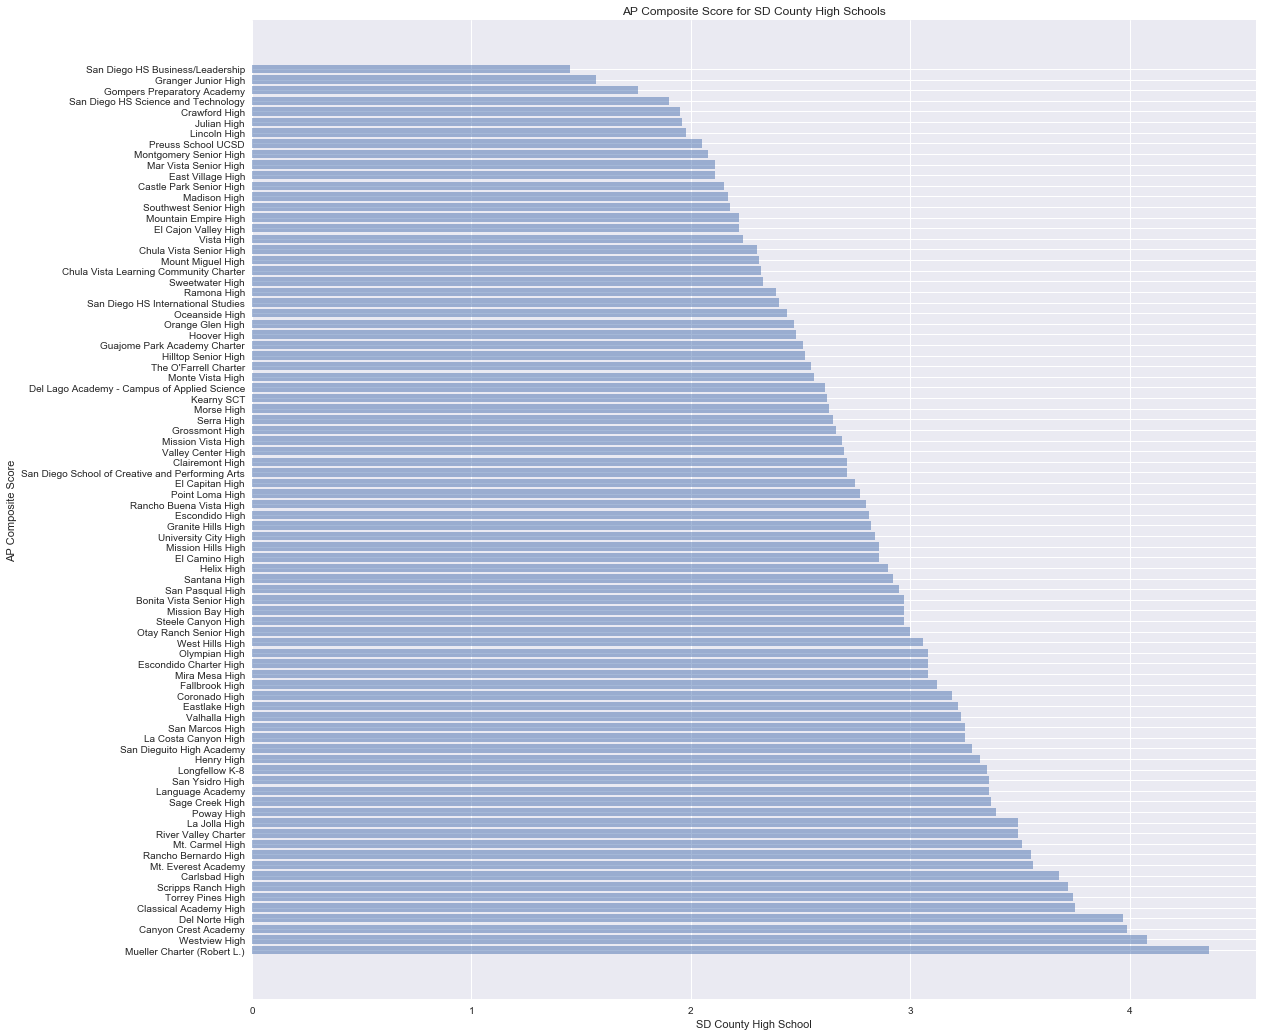

In [421]:
plt.figure(figsize=[18,18])
plt.barh(np.arange(ordered_AP_Scores.shape[0]), list(ordered_AP_Scores['2015-2016 AP Score Composite']), align='center', alpha=0.5);
plt.yticks(np.arange(ordered_AP_Scores.shape[0]), list(ordered_AP_Scores['School']));
plt.ylabel('AP Composite Score');
plt.xlabel('SD County High School');
plt.title('AP Composite Score for SD County High Schools');
savefig('./Figures/AP_Composite_Score_for_SD_County_High_Schools.png')

## Are there any trends by sub-group of student/type of school/school location?

In [422]:
city_scores = pd.DataFrame(ordered_AP_Scores.groupby(['City'])['2015-2016 AP Score Composite'].mean())
ordered_city_scores = city_scores.sort_values(by=['2015-2016 AP Score Composite'], ascending=False)
ordered_city_scores.to_csv('./AP_pass_fail_rate_city.csv', index=False)

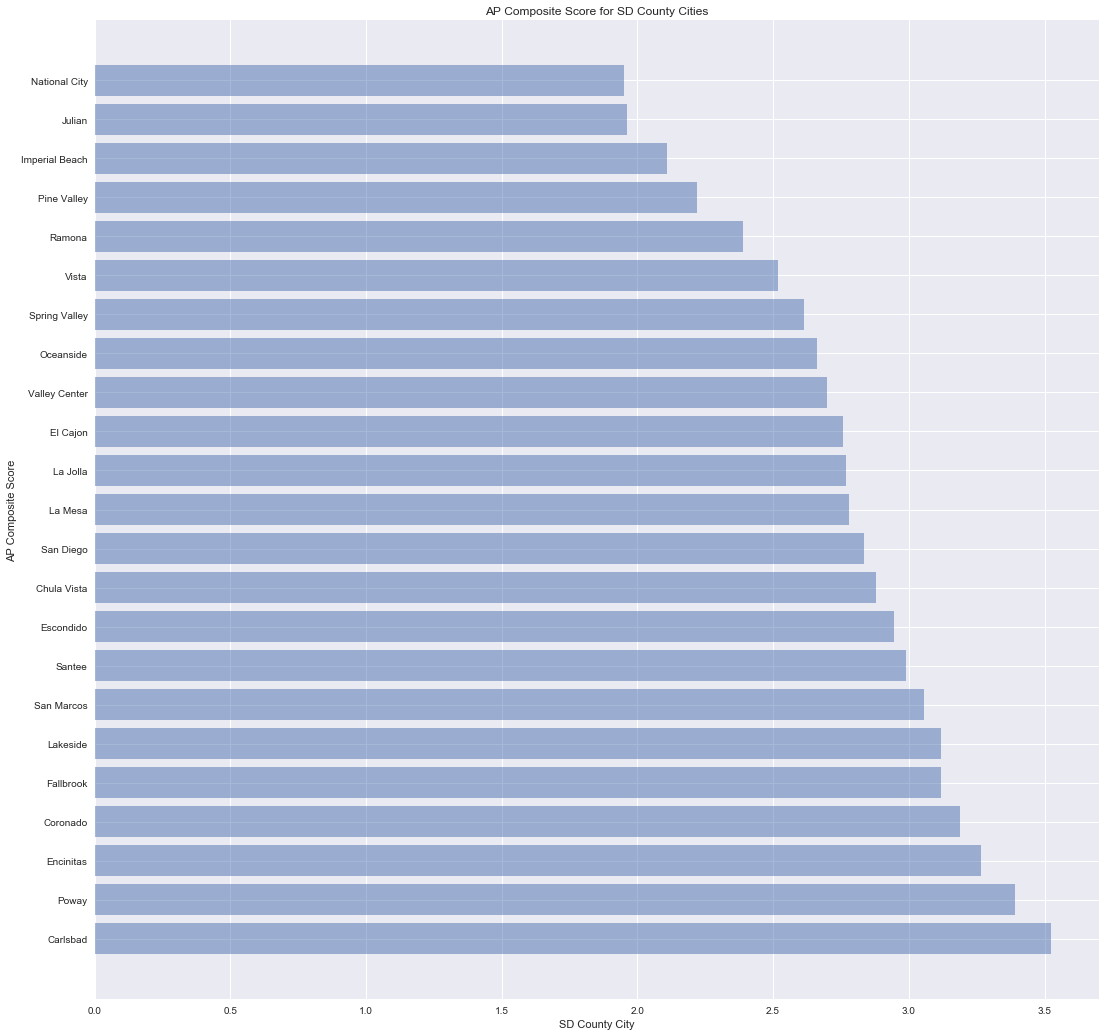

In [423]:
plt.figure(figsize=[18,18])
plt.barh(np.arange(ordered_city_scores.shape[0]), list(ordered_city_scores['2015-2016 AP Score Composite']), align='center', alpha=0.5);
plt.yticks(np.arange(ordered_city_scores.shape[0]), list(ordered_city_scores.index));
plt.ylabel('AP Composite Score');
plt.xlabel('SD County City');
plt.title('AP Composite Score for SD County Cities');
savefig('./Figures/AP_Composite_Score_for_SD_County_Cities.png')

### Data Preparation, Processing, and Cleaning

In [424]:
high_schools = schools_df[np.isfinite(schools_df['2015-2016 AP Number Tested'])]
print 'Where was AP tested, shape of high schools data: ', high_schools.shape
high_schools = high_schools[(high_schools['% 2015-2016 AP Score = 1'] != '#VALUE!')]
high_schools = high_schools[(high_schools['2015-2016 SAT: % of Test Takers Whose Total 2015-2016 SAT Scores Are Greater or Equal to 1500'] != '#VALUE!')]
high_schools = high_schools[(high_schools['2015-2016 % AP Number Tested'] != '#DIV/0!')]
high_schools = high_schools.dropna(subset=['2015-2016 SAT: % of Test Takers Whose Total 2015-2016 SAT Scores Are Greater or Equal to 1500'])
high_schools_list = high_schools['primary_key']

del high_schools['CDSCode'] # No predictive power
del high_schools['District'] # Might be predictive but ignoring it for now
del high_schools['Street'] # No predictive power
del high_schools['StreetAbr'] # No predictive power
del high_schools['City'] # No predictive power
del high_schools['*'] # No predictive power 
del high_schools['State'] # No predictive power
del high_schools['Phone'] # No predictive power
del high_schools['OpenDate'] # No predictive power
del high_schools['DOCType'] # No predictive power
del high_schools['SOC'] # No predictive power
del high_schools['SOCType'] # No predictive power
del high_schools['US News '] # No predictive power
del high_schools['GSoffered'] # No predictive power
del high_schools['Latitude'] # No predictive power
del high_schools['Longitude'] # No predictive power
del high_schools['LastUpdate'] # No predictive power
del high_schools['primary_key'] # No predictive power
del high_schools['gsid'] # No predictive power
del high_schools['2015-2016 ELA Status Level'] # No Data, Null
del high_schools['2015-2016 ELA Status Level (Decode)'] # No Data, Null
del high_schools['2015-2016 ELA Change Level'] # No Data, Null
del high_schools['2015-2016 ELA Change Level (Decode)'] # No Data, Null
del high_schools['2015-2016 ELA Color'] # No Data, Null
del high_schools['2015-2016 ELA Color (Decode)'] # No Data, Null
del high_schools['2015-2016 ELA box'] # No Data, Null
del high_schools['2015-2016 ELA box (Decode)'] # No Data, Null
del high_schools['2015-2016 Math Status Level'] # No Data, Null
del high_schools['2015-2016 Math Status Level (Decode)'] # No Data, Null
del high_schools['2015-2016 Math Change Level'] # No Data, Null
del high_schools['2015-2016 Math Change Level (Decode)'] # No Data, Null
del high_schools['2015-2016 Math Color'] # No Data, Null
del high_schools['2015-2016 Math Color (Decode)'] # No Data, Null
del high_schools['2015-2016 Math box'] # No Data, Null
del high_schools['2015-2016 Math box (Decode)'] # No Data, Null
del high_schools['2015-2016 ELA Current Status (avg. distance from level 3)'] # Prior to current change interesting
del high_schools['2015-2016 ELA Prior Status (age. Distance from level 3)'] # Prior to current change interesting
del high_schools['2015-2016 Math Current Status (avg. distance from level 3)'] # Prior to current change interesting
del high_schools['2015-2016 Math Prior Status (age. Distance from level 3)'] # Prior to current change interesting
del high_schools['2016-2017 English Language Learners'] # Percentage from total more interesting
del high_schools['2016-2017 FRPM Count'] # Percentage from total more interesting
del high_schools['2015-2016 SAT: Number of Test Takers Whose Total 2015-2016 SAT Scores Are Greater or Equal to 1500'] # Percentage from total more interesting
del high_schools['2015-2016 AP Score = 1'] # Percentage from total more interesting
del high_schools['2015-2016 AP Score = 2'] # Percentage from total more interesting
del high_schools['2015-2016 AP Score = 3'] # Percentage from total more interesting
del high_schools['2015-2016 AP Score = 4'] # Percentage from total more interesting
del high_schools['2015-2016 AP Score = 5'] # Percentage from total more interesting
del high_schools['2015-2016 Enrollment Grades 10-12'] # Percentage from total more interesting
del high_schools['2015-2016 AP Number Tested'] # Percentage from total more interesting

### Process the data
high_schools.replace(to_replace=['X','x'], value=1, inplace=True)
high_schools['Charter'].replace(to_replace=['N'], value=0, inplace=True)
high_schools['Charter'].replace(to_replace=['Y'], value=1, inplace=True)
high_schools[['IB', 'AVID', 'Dual Language', 'Arts', 'Education Equity']] = high_schools[['IB', 'AVID', 'Dual Language', 'Arts', 'Education Equity']].fillna(0)
# high_schools[['Charter', 'IB', 'AVID', 'Dual Language', 'Arts', 'Education Equity']] = high_schools[['Charter', 'IB', 'AVID', 'Dual Language', 'Arts', 'Education Equity']].astype(str)
SATs = ['2015-2016 SAT: AvgScrRead', '2015-2016 SAT: AvgScrMath', '2015-2016 SAT: AvgScrWrit']
for SAT in SATs:
    high_schools[SAT] = high_schools[SAT].astype(int)
scores = ['% 2015-2016 AP Score = 1', '% 2015-2016 AP Score = 2', '% 2015-2016 AP Score = 3', '% 2015-2016 AP Score = 4', 
          '% 2015-2016 AP Score = 5', '2015-2016 ELA Change (Difference between current and prior status)', 
          '2015-2016 Math Change (Difference between current and prior status)','2016-2017 % English Language Learners', 
          '2015-2016 SAT: % of Test Takers Whose Total 2015-2016 SAT Scores Are Greater or Equal to 1500',
          '2016-2017 % FRPM Count', '2015-2016 % AP Number Tested']  
for score in scores:
    high_schools[score] = high_schools[score].apply(lambda x: x.strip('%')).astype(float)
high_schools['2015-2016 AP Score Composite'] = (high_schools['% 2015-2016 AP Score = 1']*1 + high_schools['% 2015-2016 AP Score = 2']*2 +
                                         high_schools['% 2015-2016 AP Score = 3']*3 + high_schools['% 2015-2016 AP Score = 4']*4 +
                                         high_schools['% 2015-2016 AP Score = 5']*5)/ (high_schools['% 2015-2016 AP Score = 1'] + 
                                                                                       high_schools['% 2015-2016 AP Score = 2'] + 
                                                                                       high_schools['% 2015-2016 AP Score = 3'] + 
                                                                                       high_schools['% 2015-2016 AP Score = 4'] + 
                                                                                       high_schools['% 2015-2016 AP Score = 5'])
high_schools['2015-2016 AP Score Composite'] = np.round(high_schools['2015-2016 AP Score Composite'], 2)
del high_schools['% 2015-2016 AP Score = 1'] # Captured in composite score
del high_schools['% 2015-2016 AP Score = 2'] # Captured in composite score
del high_schools['% 2015-2016 AP Score = 3'] # Captured in composite score
del high_schools['% 2015-2016 AP Score = 4'] # Captured in composite score
del high_schools['% 2015-2016 AP Score = 5'] # Captured in composite score

print 'Where nonesense data dropped, shape of high schools data: ', high_schools.shape

Where was AP tested, shape of high schools data:  (142, 71)
Where nonesense data dropped, shape of high schools data:  (77, 18)


In [425]:
cols = list(high_schools.columns)
for c in range(len(cols)):
    print'\nColumn: ', cols[c], '\nType: ', type(high_schools[cols[c]].unique()[0])


Column:  School 
Type:  <type 'str'>

Column:  Charter 
Type:  <type 'numpy.int64'>

Column:  2016-2017 Total Enrollment 
Type:  <type 'numpy.float64'>

Column:  2015-2016 ELA Change (Difference between current and prior status) 
Type:  <type 'numpy.float64'>

Column:  2015-2016 Math Change (Difference between current and prior status) 
Type:  <type 'numpy.float64'>

Column:  2016-2017 % English Language Learners 
Type:  <type 'numpy.float64'>

Column:  2016-2017 % FRPM Count 
Type:  <type 'numpy.float64'>

Column:  2015-2016 SAT: AvgScrRead 
Type:  <type 'numpy.int64'>

Column:  2015-2016 SAT: AvgScrMath 
Type:  <type 'numpy.int64'>

Column:  2015-2016 SAT: AvgScrWrit 
Type:  <type 'numpy.int64'>

Column:  2015-2016 SAT: % of Test Takers Whose Total 2015-2016 SAT Scores Are Greater or Equal to 1500 
Type:  <type 'numpy.float64'>

Column:  2015-2016 % AP Number Tested 
Type:  <type 'numpy.float64'>

Column:  IB 
Type:  <type 'numpy.float64'>

Column:  AVID 
Type:  <type 'numpy.float64

# Correlational Questions
## Is there a relationship between elementary ELA test scores or Math Test scores and AP pass/fail rates for those schools that feed into each high school?
## Are there any other relationships between student/school characteristics and AP pass/fail rates?

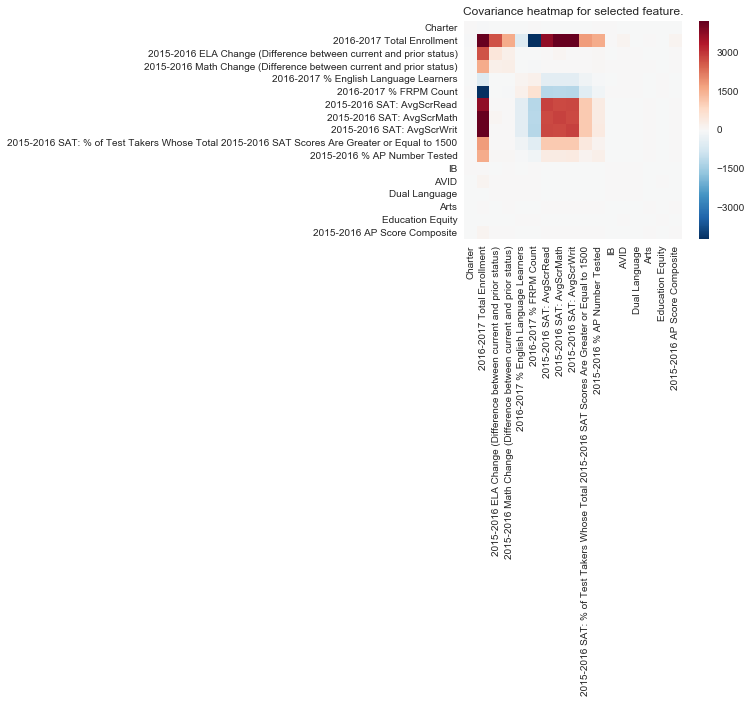

In [426]:
import seaborn as sns
mat = high_schools.ix[:, 1:].cov() # to get a heatmap of the covariance matrix
mat.to_csv('feature_covariance_matrix.csv')
a = sns.heatmap(mat, vmax=1, square = True)
a.set_title('Covariance heatmap for selected feature.');
# savefig('./Figures/feature_covariance_heatmap.png')

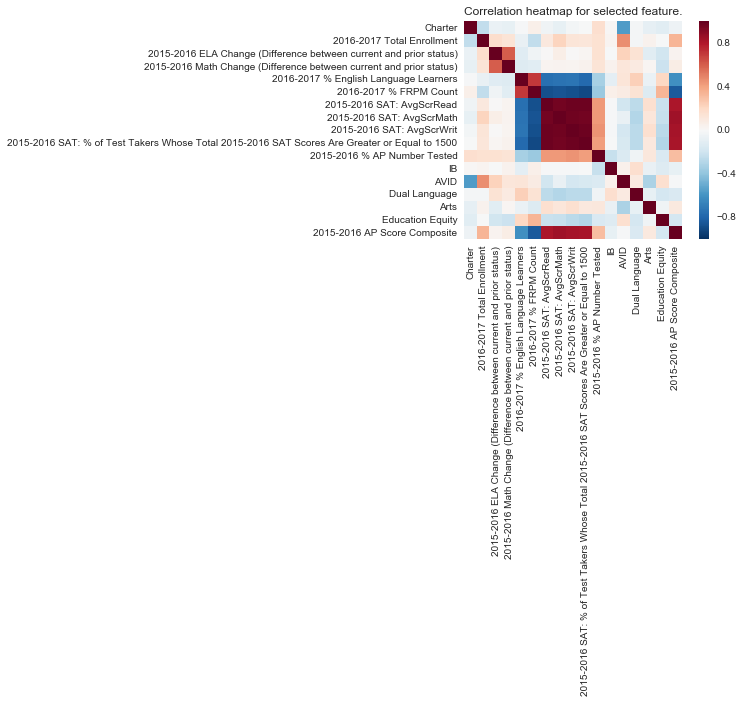

In [427]:
mat = high_schools.ix[:, 1:].corr() # to get a heatmap of the correlation matrix
mat.to_csv('feature_correlation_matrix.csv')
a = sns.heatmap(mat, vmax=1, square = True)
a.set_title('Correlation heatmap for selected feature.');
# savefig('./Figures/feature_correlation_heatmap.png')

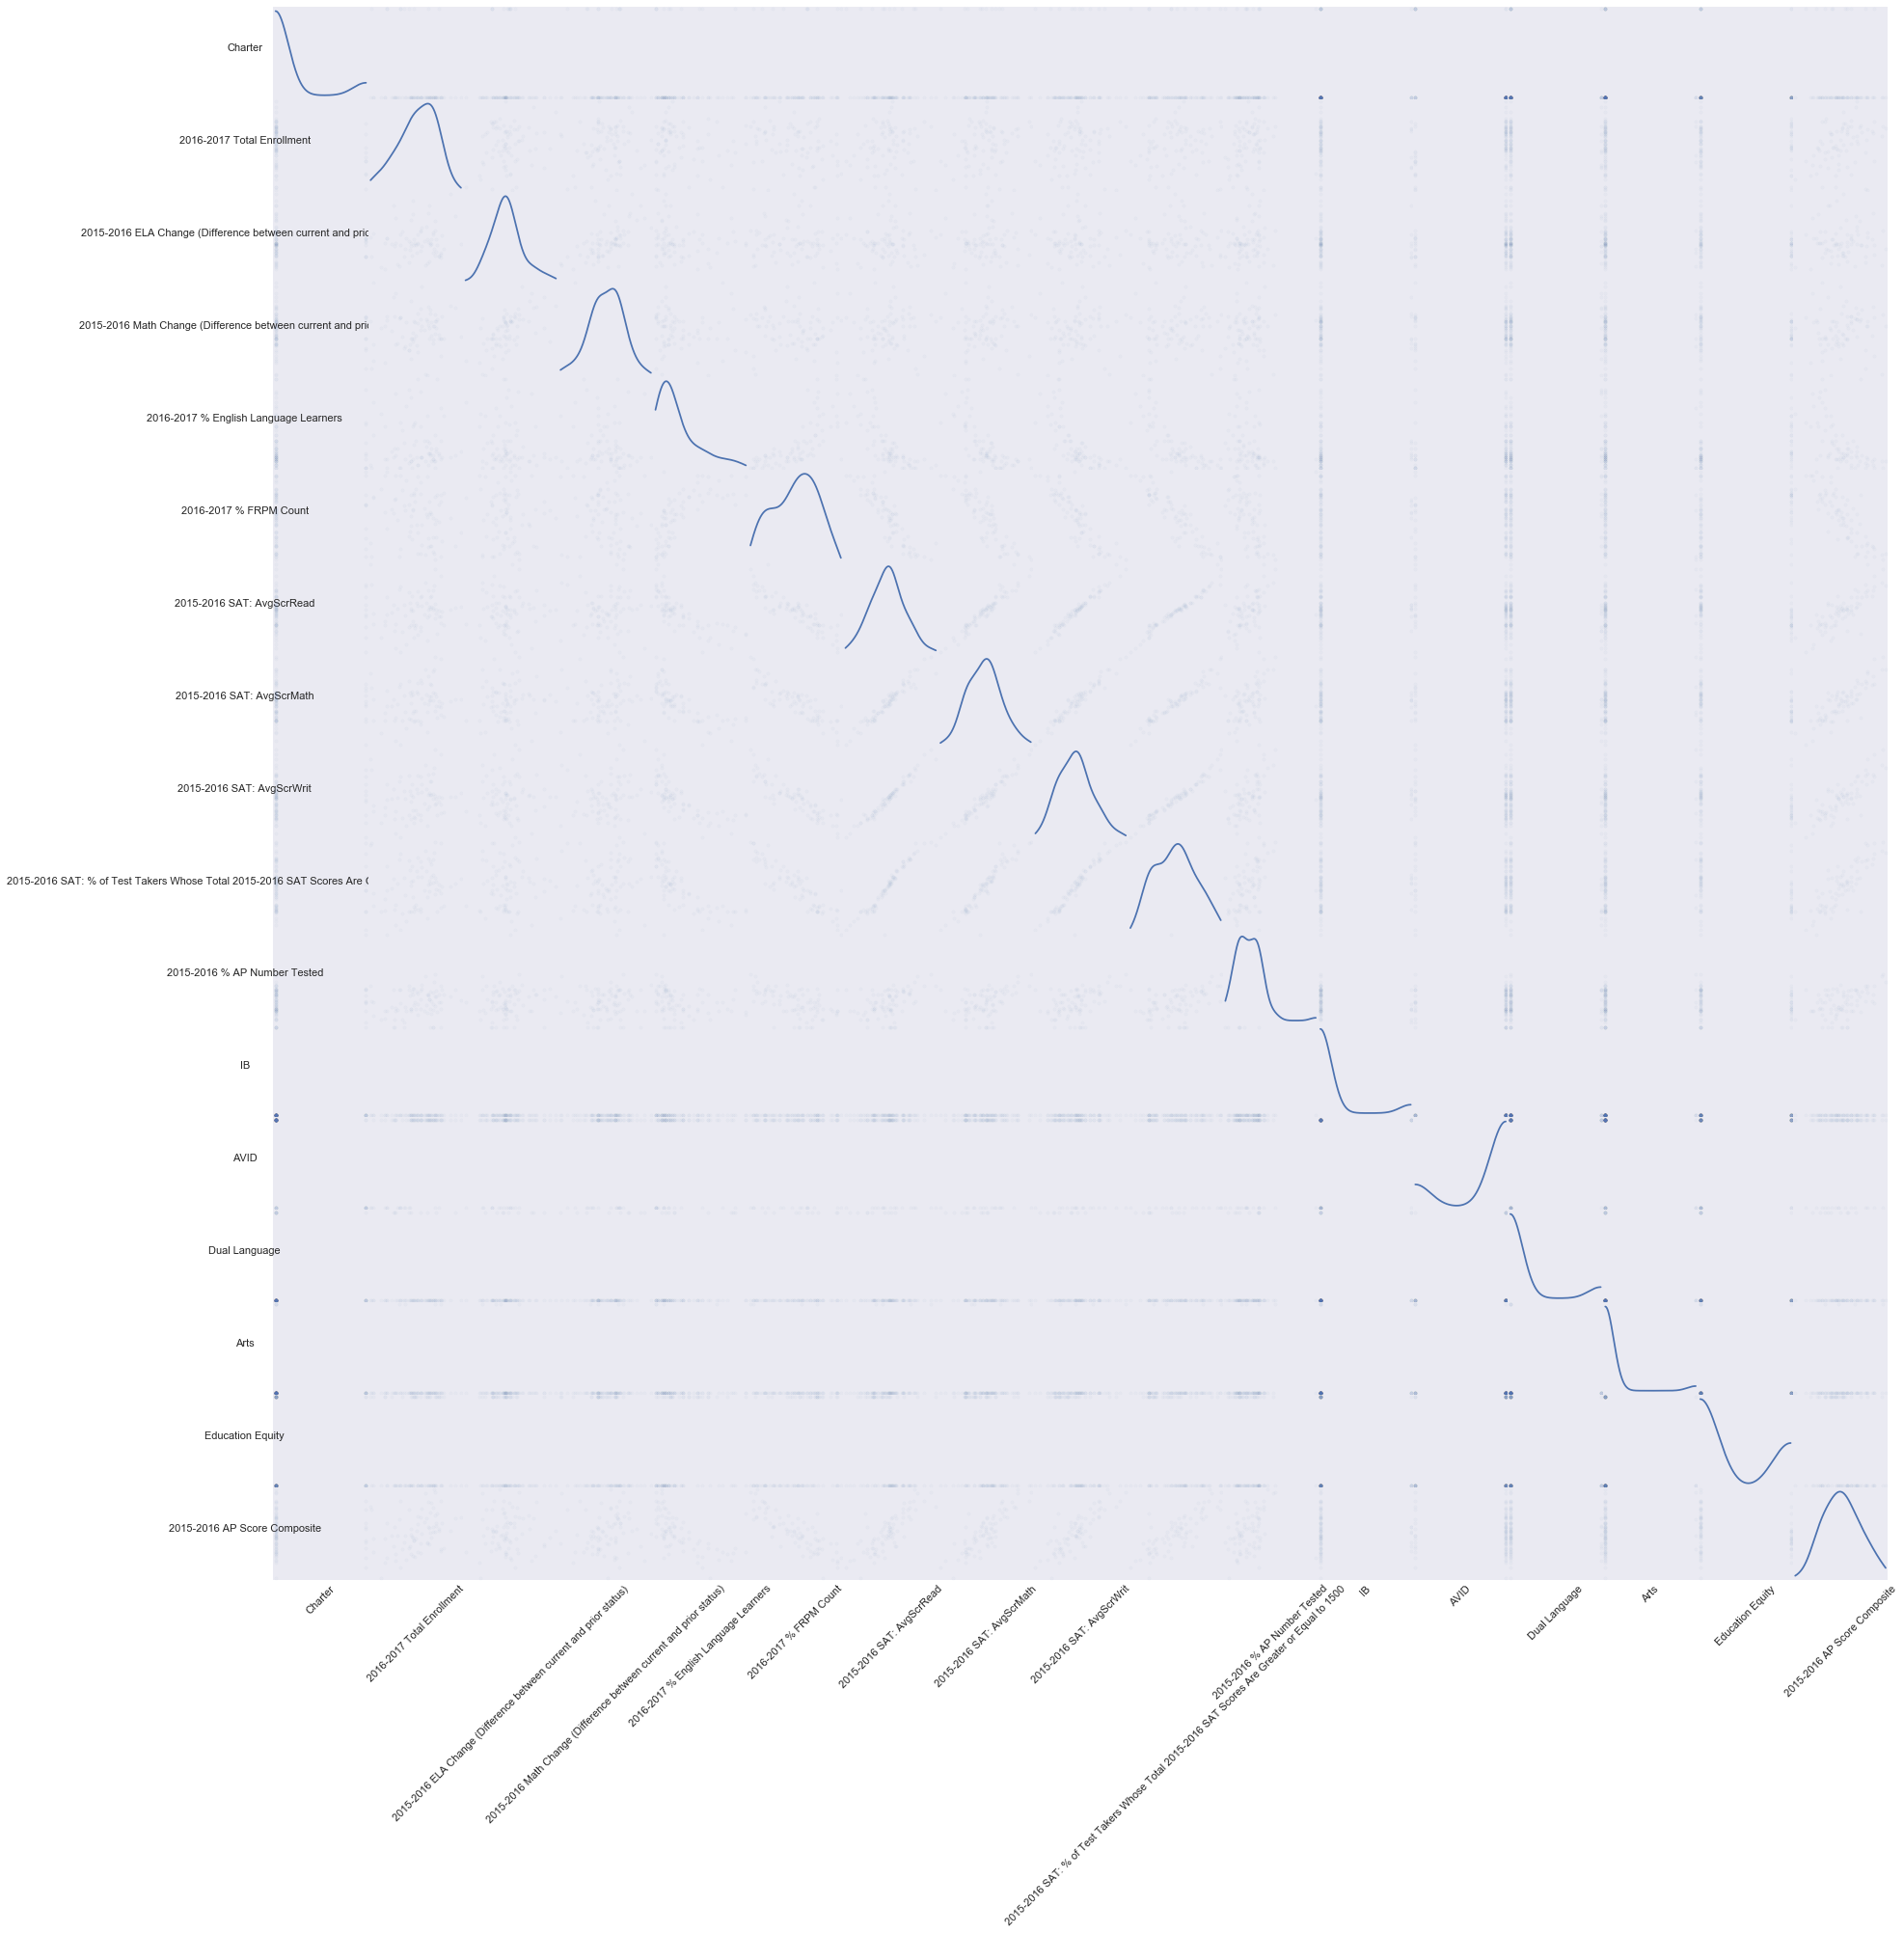

In [428]:
from pandas.tools.plotting import scatter_matrix
sm = scatter_matrix(high_schools.ix[:, 1:], alpha=0.03, figsize=(30, 30), diagonal='kde')
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)];
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)];

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)];

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)];
[s.set_yticks(()) for s in sm.reshape(-1)];
savefig('./Figures/feature_scatter_matrix.png')

# Predictive Question
## Predict the AP pass/fail rate for each high school in my district based on elementarty school characteristics.

Note: Focusing on minimizing the mean squared error.

In [429]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [430]:
X = high_schools.ix[:, 1:-1]
y = high_schools['2015-2016 AP Score Composite']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print 'Training samples: ', y_train.shape[0]
print 'Testing samples: ', y_test.shape[0]

Training samples:  61
Testing samples:  16


### Linear Regression

In [393]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print 'Mean squared error: ', mean_squared_error(y_test, y_pred)

Mean squared error:  0.153885892918


In [394]:
coeff_mapping = dict(zip(X_train.columns, lr.coef_))
print 'Coefficients: '
for cm in range(len(coeff_mapping)):
    print coeff_mapping.keys()[cm], ': ', coeff_mapping.values()[cm]
    
print '\nIntercept: ', lr.intercept_

Coefficients: 
Charter :  0.0138852593482
IB :  -0.215036212319
2015-2016 ELA Change (Difference between current and prior status) :  -0.00251213392298
2015-2016 Math Change (Difference between current and prior status) :  0.00421449204012
2016-2017 % English Language Learners :  -0.000966539660395
2015-2016 SAT: AvgScrWrit :  0.0088434623387
AVID :  -0.0361338621381
Arts :  -0.145489929854
2015-2016 SAT: % of Test Takers Whose Total 2015-2016 SAT Scores Are Greater or Equal to 1500 :  -0.0180519510478
2015-2016 SAT: AvgScrMath :  0.00697047826187
2015-2016 SAT: AvgScrRead :  -0.00274398894828
2016-2017 % FRPM Count :  -0.00663534728466
2015-2016 % AP Number Tested :  -0.00404794529971
2016-2017 Total Enrollment :  0.000229619182197
Dual Language :  0.0468746798779
Education Equity :  0.0168119807812

Intercept:  -2.71387028657


### Decision Tree Regressor

In [396]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print 'Mean squared error: ', mean_squared_error(y_test, y_pred)

Mean squared error:  0.21999375


In [400]:
fi_mapping = dict(zip(X_train.columns, dt.feature_importances_))
print 'Feature importance: '
for cm in range(len(fi_mapping)):
    print fi_mapping.keys()[cm], ': ', fi_mapping.values()[cm]

Feature importance: 
Charter :  0.0
IB :  0.0
2015-2016 ELA Change (Difference between current and prior status) :  0.0167349648086
2015-2016 Math Change (Difference between current and prior status) :  0.0402830550505
2016-2017 % English Language Learners :  0.0265376596598
2015-2016 SAT: AvgScrWrit :  0.542677953501
AVID :  4.04735941315e-05
Arts :  0.0
2015-2016 SAT: % of Test Takers Whose Total 2015-2016 SAT Scores Are Greater or Equal to 1500 :  0.0359268895606
2015-2016 SAT: AvgScrMath :  0.240891586077
2015-2016 SAT: AvgScrRead :  0.000843199877739
2016-2017 % FRPM Count :  0.0223085391653
2015-2016 % AP Number Tested :  0.0171645983112
2016-2017 Total Enrollment :  0.056436774816
Dual Language :  9.10655867958e-05
Education Equity :  6.32399908303e-05
